### Meta-connectivity

Analysis of the global meta-connectivity

In [1]:
# Adding GDa to path
import os
import sys

sys.path.insert(1, "/home/vinicius/storage1/projects/GrayData-Analysis")

import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from GDa.graphics import plot
from GDa.net.static import _modularity
from GDa.util import _extract_roi
from tqdm import tqdm

#### Plotting and file saving configurations

In [2]:
SMALL_SIZE, MEDIUM_SIZE, BIGGER_SIZE = plot.set_plot_config()

In [3]:
_ROOT = os.path.expanduser("~/funcog/gda")
_RESULTS = "Results/lucy/meta_conn"
_FILE = os.path.join(_ROOT, _RESULTS, f"MC_coh_global.nc")

In [4]:
MC = xr.load_dataarray(_FILE)

#### Detecting communities in the MC matrix

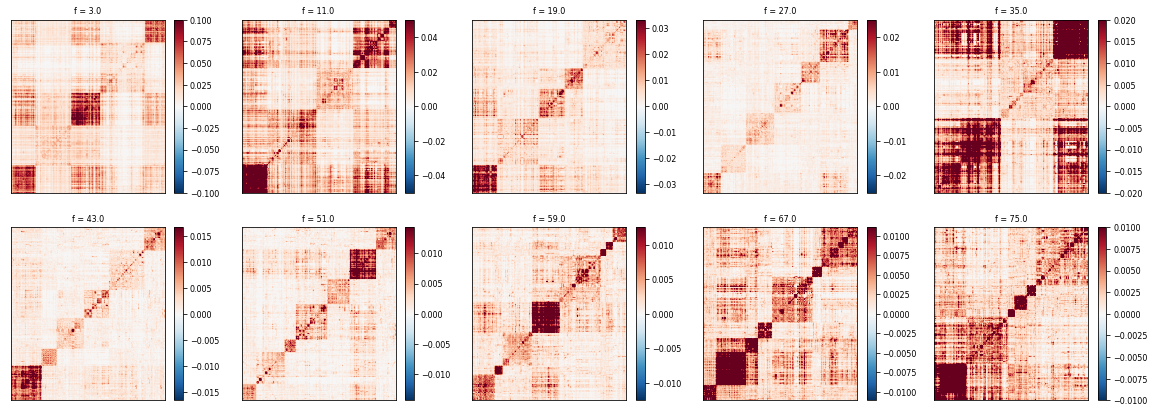

In [8]:
plt.figure(figsize=(20, 7))
for i in range(10):
    av, q = _modularity(A=MC.isel(freqs=i).values, backend="brainconn")
    idx = np.argsort(av)
    plt.subplot(2, 5, i + 1)
    plt.imshow(
        MC.isel(freqs=i).values[np.ix_(idx, idx)],
        aspect="auto",
        cmap="RdBu_r",
        vmin=-0.1/(i+1),
        vmax=0.1/(i+1),
        origin="lower",
    )
    plt.colorbar()
    plt.xticks([])
    plt.yticks([])
    plt.title(f"f = {MC.freqs.values[i]}")